# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"q="+city+"&APPID="+weather_api_key+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json =  city_weather.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        #break
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | maintirano
Processing Record 4 of Set 1 | la'ie
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | bois-le-roi
Processing Record 10 of Set 1 | kidal
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | wynyard
Processing Record 13 of Set 1 | am timan
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | garoowe
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | kapuskasing
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | college
Processing Record 23 o

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,3.90,85,40,1.54,CA,1697384107
1,adamstown,-25.0660,-130.1015,21.27,84,0,2.20,PN,1697384143
2,maintirano,-18.0667,44.0167,26.68,84,0,1.97,MG,1697384143
3,la'ie,21.6477,-157.9253,25.00,86,96,2.86,US,1697384143
4,port-aux-francais,-49.3500,70.2167,1.11,65,85,12.62,TF,1697384143


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,3.90,85,40,1.54,CA,1697384107
1,adamstown,-25.0660,-130.1015,21.27,84,0,2.20,PN,1697384143
2,maintirano,-18.0667,44.0167,26.68,84,0,1.97,MG,1697384143
3,la'ie,21.6477,-157.9253,25.00,86,96,2.86,US,1697384143
4,port-aux-francais,-49.3500,70.2167,1.11,65,85,12.62,TF,1697384143


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

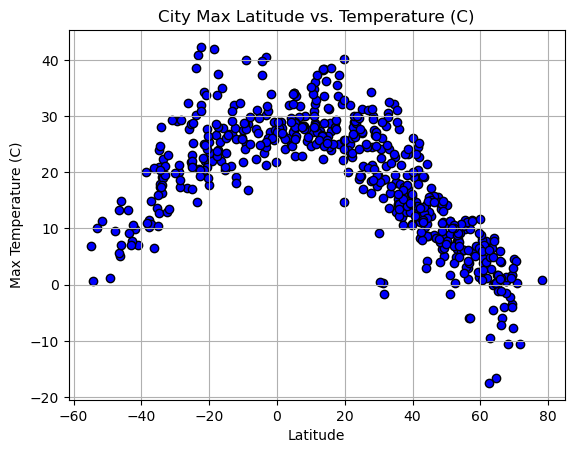

In [37]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(latitude,temp,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

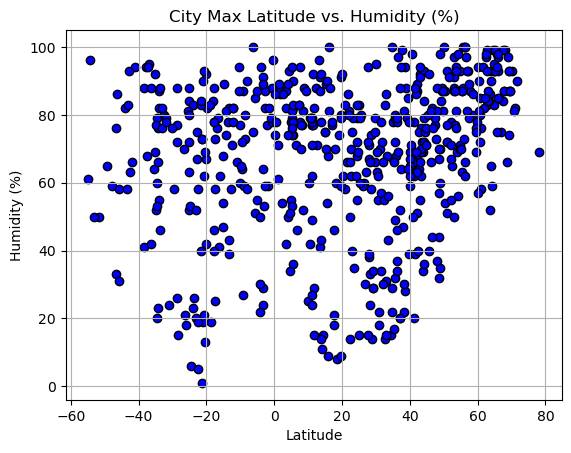

In [38]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude,humidity,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

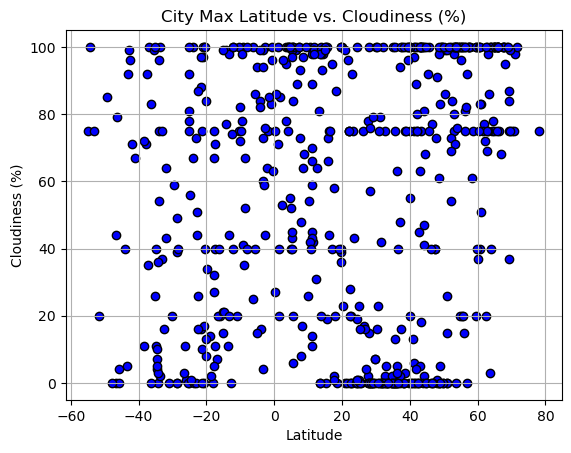

In [39]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]
plt.scatter(latitude,cloud,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

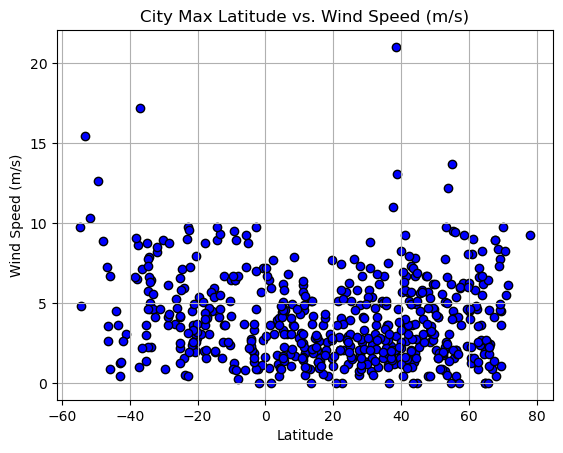

In [40]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(latitude,wind,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def linfunc(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regressval = x * slope + intercept 
    plt.scatter(x,y,marker ="o",facecolors = "blue",edgecolors = "black")
    plt.plot(x,regressval,"r-")
    plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
    plt.grid
    xlabel = "Latitude"
    label = abel
    ylabel = label
    plt.xlabel(xlabel)
    plt.ylabel(label)
    print(f"The r-value is: {rvalue}")
    plt.show
    return 

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,3.90,85,40,1.54,CA,1697384107
3,la'ie,21.6477,-157.9253,25.00,86,96,2.86,US,1697384143
6,hadibu,12.6500,54.0333,27.42,71,64,1.99,YE,1697384144
8,bois-le-roi,48.4735,2.7046,13.95,44,0,2.57,FR,1697384144
9,kidal,18.4411,1.4078,37.36,8,0,0.44,ML,1697384144


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.27,84,0,2.20,PN,1697384143
2,maintirano,-18.0667,44.0167,26.68,84,0,1.97,MG,1697384143
4,port-aux-francais,-49.3500,70.2167,1.11,65,85,12.62,TF,1697384143
5,lebu,-37.6167,-73.6500,11.56,68,92,8.61,CL,1697383886
7,invercargill,-46.4000,168.3500,5.01,86,79,3.58,NZ,1697383865


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8754890428227845


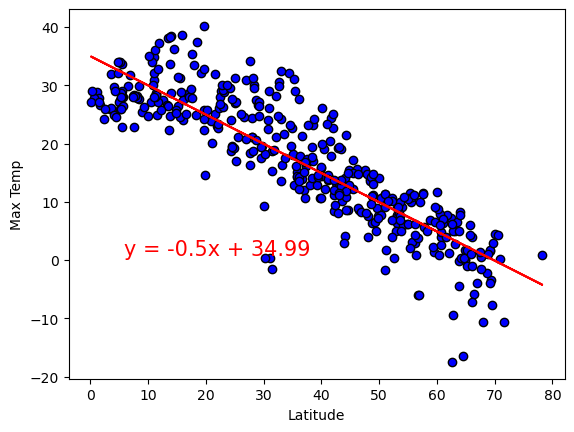

In [44]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
abel = "Max Temp"
linfunc(x,y)



The r-value is: 0.7023219599755824


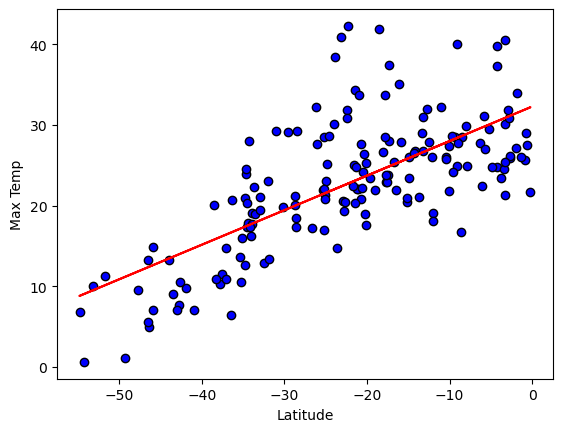

In [45]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
abel = "Max Temp"
linfunc(x,y)

**Discussion about the linear relationship:** There is a strong (72%) correlation between the latitude of a city on the southern hemisphere and its maximum temperature. There is an even stronger correlation (82%) between the latitude of a city and its maximum temperature on the northern hemisphere. This stronger correlation on the northern hemisphere could be explained by the earth tilt on is axis.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.27768962012667114


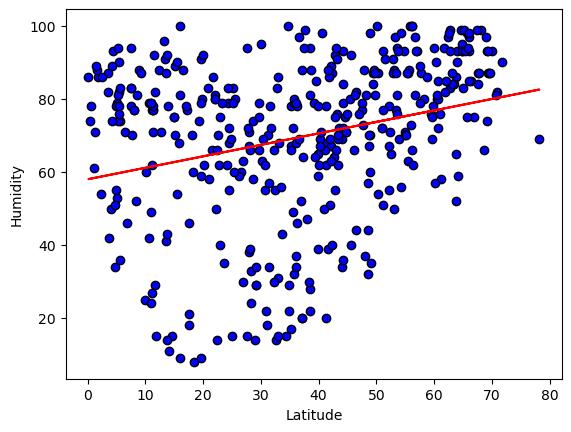

In [46]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
abel = "Humidity"
linfunc(x,y)

The r-value is: 0.03644743671532685


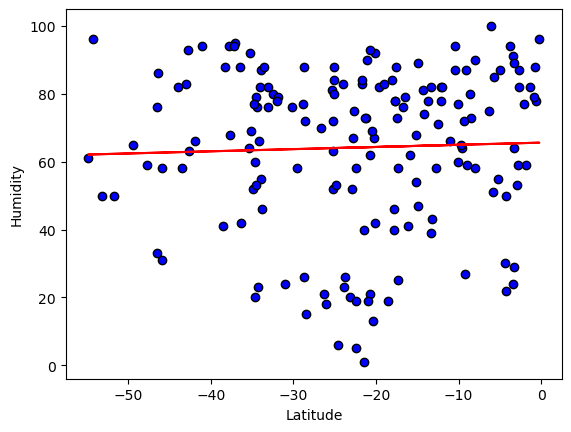

In [47]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
abel = "Humidity"
linfunc(x,y)

**Discussion about the linear relationship:** The latitude of a city on both the northern and the southern hemisphere likely has nothing to do with the humidity of that city. The percentage explained by these linear regression plots is extremely low. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16383110200792259


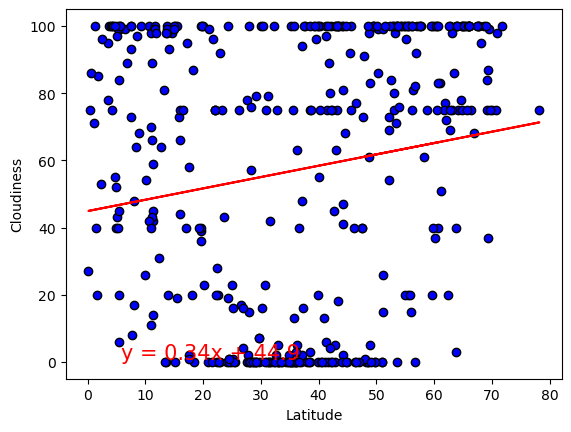

In [48]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
abel = "Cloudiness"
linfunc(x,y)

The r-value is: 0.1831908248660296


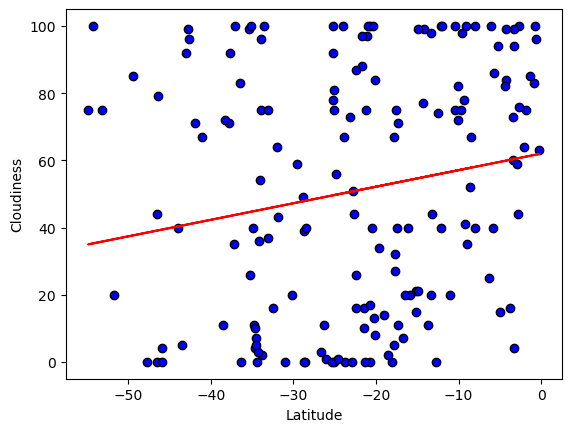

In [49]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
abel = "Cloudiness"
linfunc(x,y)

**Discussion about the linear relationship:** There is a very low percent chance that the latitude of a city can explain the cloudiness of that city. The cloudiness of a city might be better explained if we were to compare the air pressure to the geography of a city. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.16453294464500814


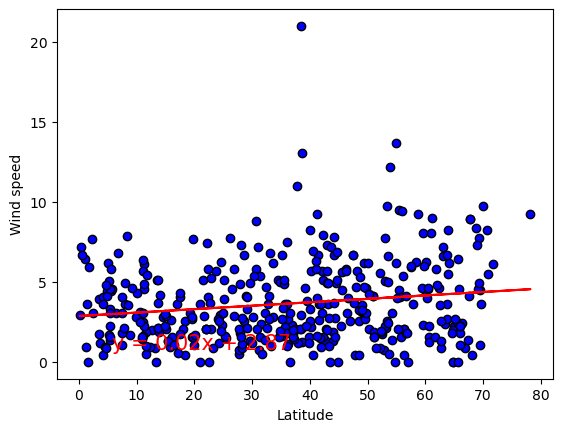

In [50]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
abel = "Wind speed"
linfunc(x,y)

The r-value is: -0.25557474972108485


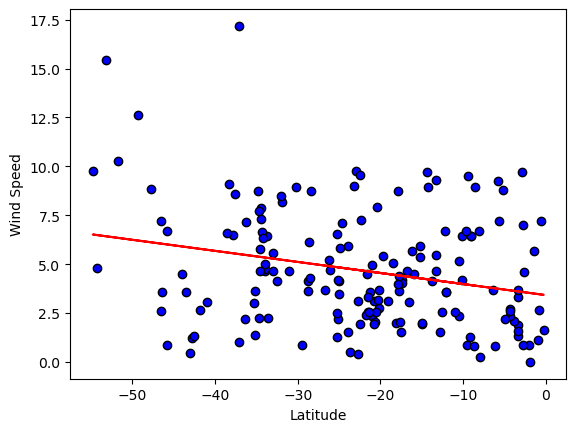

In [51]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
abel = "Wind Speed"
linfunc(x,y)

**Discussion about the linear relationship:** 
It appears as if there is a 28 percent chance that the wind speed of a city could be determined by the latitude of a city in the northern hemisphere.
There is actually a negative 30 percent chance that the latitude affects the wind speed of a city in the southern hemisphere. 